In [1]:
import numpy as np
import scipy.signal as sps
import scipy as sp
import pylab as pl

(array([ 3.,  2.,  1.,  3.,  7., 11., 16., 22., 26., 41., 37., 44., 36.,
        44., 40., 26., 39., 36., 25., 20., 11.,  9.,  2.,  4.,  3.,  0.,
         0.,  2.,  0.,  2.]),
 array([-3.17061417, -2.92635112, -2.68208807, -2.43782502, -2.19356197,
        -1.94929892, -1.70503587, -1.46077282, -1.21650977, -0.97224672,
        -0.72798367, -0.48372062, -0.23945757,  0.00480548,  0.24906853,
         0.49333158,  0.73759463,  0.98185768,  1.22612073,  1.47038378,
         1.71464683,  1.95890988,  2.20317293,  2.44743597,  2.69169902,
         2.93596207,  3.18022512,  3.42448817,  3.66875122,  3.91301427,
         4.15727732]),
 <BarContainer object of 30 artists>)

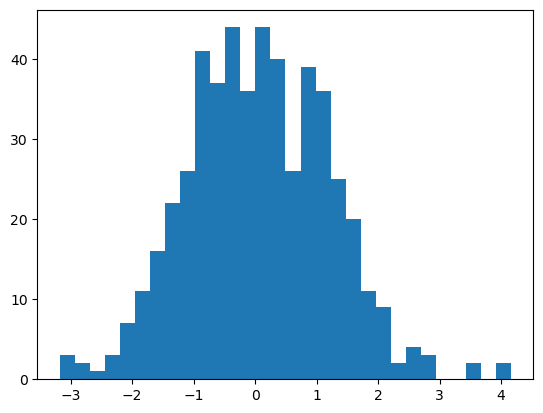

In [18]:
N = 512
b = np.random.randn(N)*np.sqrt(1.2)
pl.hist(x = b, bins = 30)

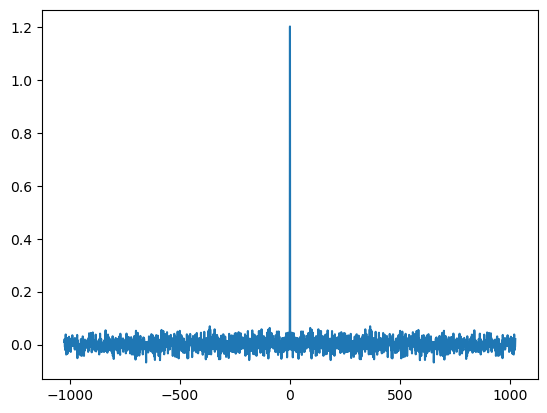

In [6]:
auto_cor = np.correlate(b,b, mode = "same")/N
tau = np.arange(N) - N//2
pl.plot(tau,auto_cor)

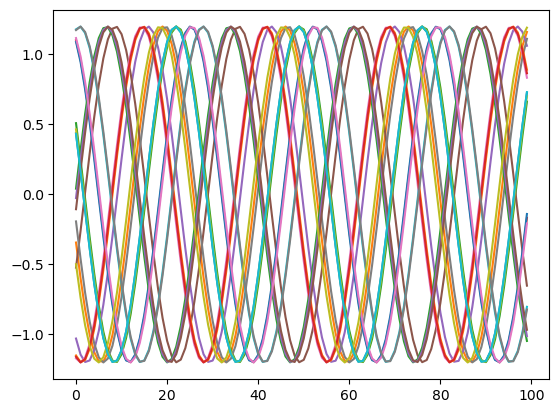

In [15]:
A = 1.2
N = 512
f0 = 0.037
x = np.zeros(512)
for i in range(512):
    x[i] = A*np.cos(2*np.pi*f0*i+np.random.uniform(low = 0.0, high = 2*np.pi))
pl.figure()
for j in range(20):
    teta = np.random.uniform(low = 0.0, high = 2*np.pi)
    for i in range(512):
        x[i] = A*np.cos(2*np.pi*f0*i+teta)
    pl.plot(np.arange(100),x[0:100])
pl.show()
    

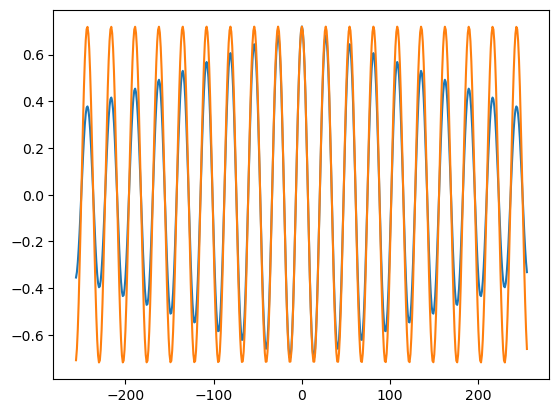

In [16]:
auto_cor = np.correlate(x,x, mode = "same")/N
tau = np.arange(N) - N//2
pl.figure()
pl.plot(tau,auto_cor)
pl.plot(tau,A**2/2*np.cos(2*np.pi*f0*tau))

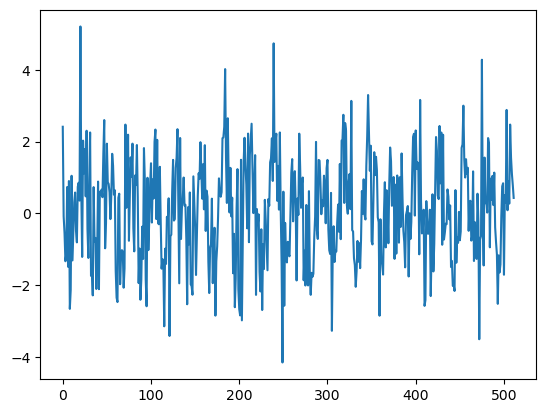

In [20]:
y = x + b
pl.figure()
pl.plot(np.arange(N),y)
pl.show()

In [21]:
rsb = sum(x**2)/sum(b**2)
print(rsb)

0.5504173224279651


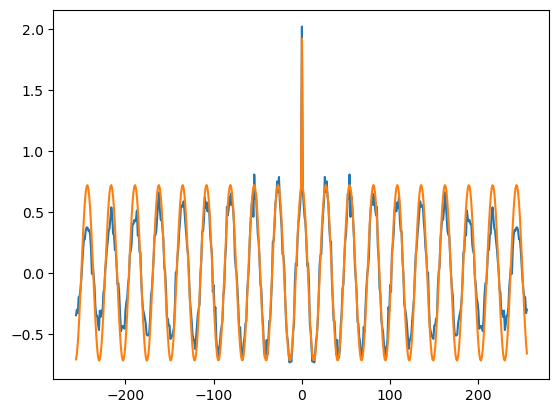

In [23]:
auto_cor = np.correlate(y,y, mode = "same")/N
tau = np.arange(N) - N//2
pl.figure()
pl.plot(tau,auto_cor)
auto_cor_theorie = A**2/2*np.cos(2*np.pi*f0*tau)
auto_cor_theorie[N//2] += 1.2
pl.plot(tau,auto_cor_theorie)

257


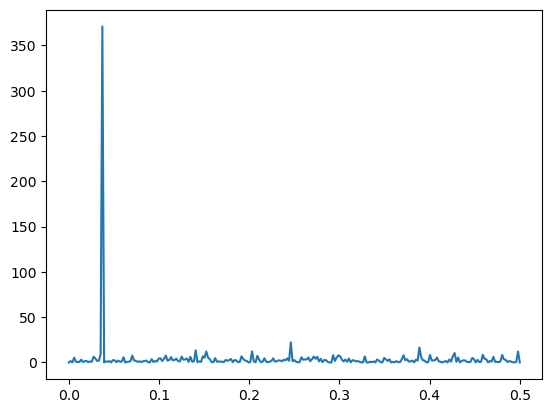

In [33]:
_,dens_spectrale = sp.signal.periodogram(y)
print(len(dens_spectrale))
f = np.linspace(0,0.5,257)
pl.plot(f,dens_spectrale)

In [34]:
N = 4096
f0 = 0.05
x = np.cos(2*np.pi*f0*np.arange(N))+0.75*np.cos(4*np.pi*f0*np.arange(N))
b = np.random.randn(N)
y = x+b

In [37]:
ffty = abs(np.fft.fft(y))/N
fftx = abs(np.fft.fft(x))/N
abscisse = np.fft.fftfreq(N)

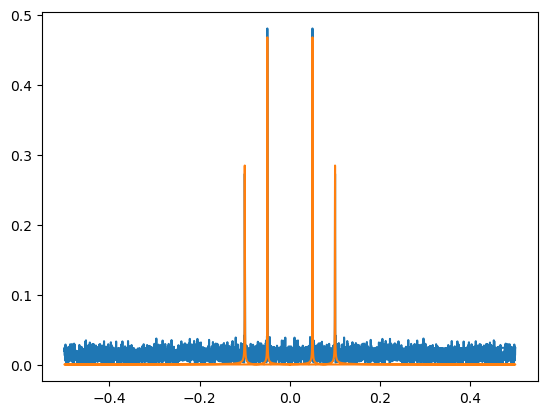

In [38]:
pl.plot(abscisse,ffty)
pl.plot(abscisse,fftx)
pl.show()

[ 0.00022551-4.23516474e-21j  0.00026483+1.27054942e-20j
  0.00025055-2.18110984e-20j ... -0.00020925-3.38813179e-20j
 -0.00044388-3.64224167e-20j -0.0003551 +8.72443936e-20j]


C:\Users\caotr\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\caotr\anaconda3\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


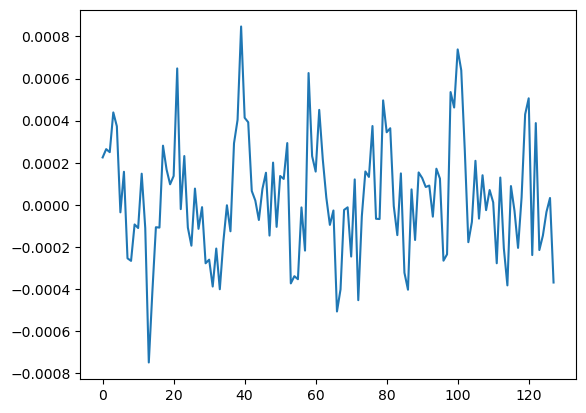

[ 4.39577463e-04-4.15046144e-20j  1.41567807e-04-6.77626358e-21j
  3.68137918e-04-5.03984604e-20j ... -8.44107585e-05+2.54109884e-21j
 -1.57384964e-04+2.06464281e-20j -2.18731981e-04-5.92923063e-21j]


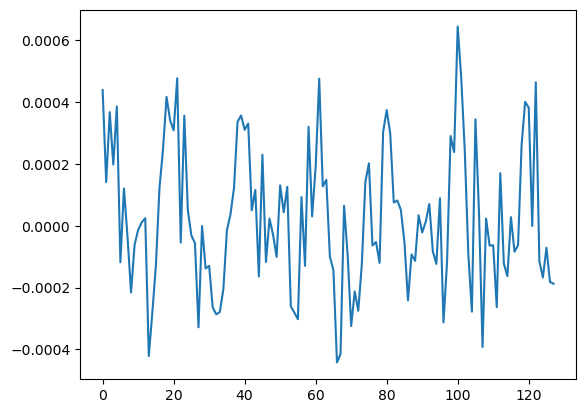

[ 1.76028413e-04-3.38813179e-21j  2.65736512e-04-8.47032947e-21j
  2.82871547e-04+6.77626358e-21j ... -1.23141840e-04+3.72694497e-20j
 -5.18679197e-05+4.74338450e-20j  9.25570833e-05+4.36221968e-20j]


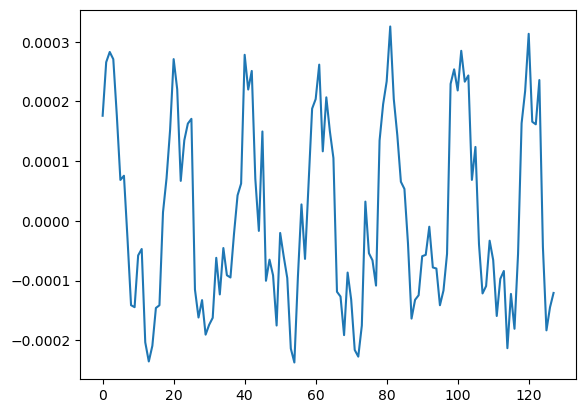

[ 1.70559350e-04+1.18584613e-20j  2.27698037e-04+7.62329653e-21j
  2.48342184e-04+8.47032947e-22j ... -6.28647464e-05-2.71050543e-20j
  7.61039997e-06+1.01643954e-20j  9.10351831e-05+2.54109884e-20j]


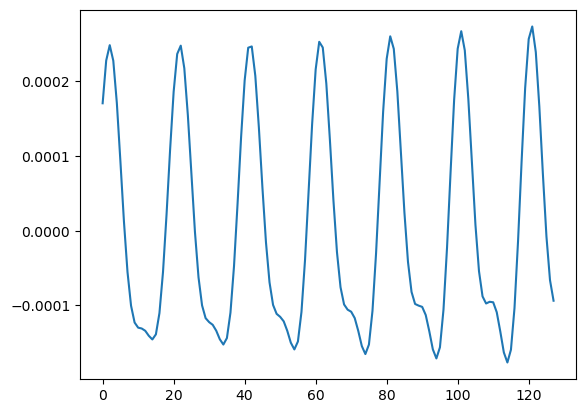

[ 1.42900996e-04+1.18584613e-20j  1.89751575e-04+1.35525272e-20j
  2.09604805e-04+8.47032947e-22j ... -4.15707827e-05-1.18584613e-20j
  1.48055539e-05+1.01643954e-20j  8.01297523e-05+2.37169225e-20j]


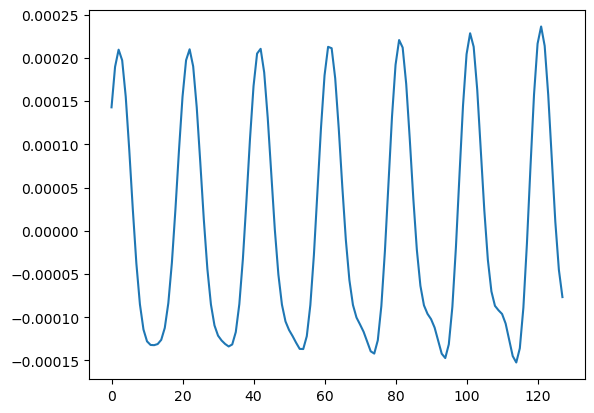

[ 1.49167119e-04+1.35525272e-20j  2.10304325e-04+8.47032947e-21j
  2.38181785e-04+3.38813179e-21j ... -6.02429033e-05+1.01643954e-20j
 -3.22613585e-06+6.77626358e-21j  7.16118620e-05+2.37169225e-20j]


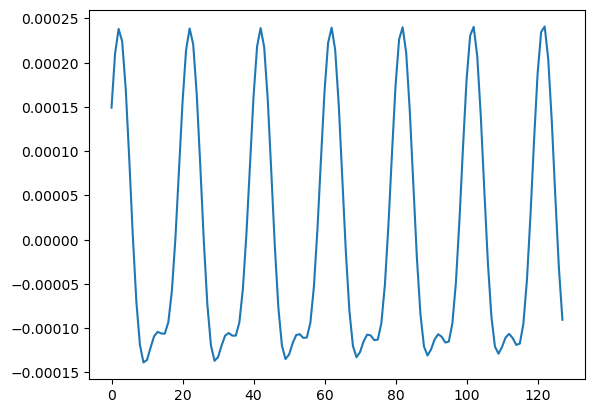

[ 1.54174344e-04+1.35525272e-20j  1.95797094e-04+8.47032947e-21j
  2.09738046e-04+1.69406589e-21j ... -3.19550464e-05+1.01643954e-20j
  2.82713025e-05+6.77626358e-21j  9.42082943e-05+2.37169225e-20j]


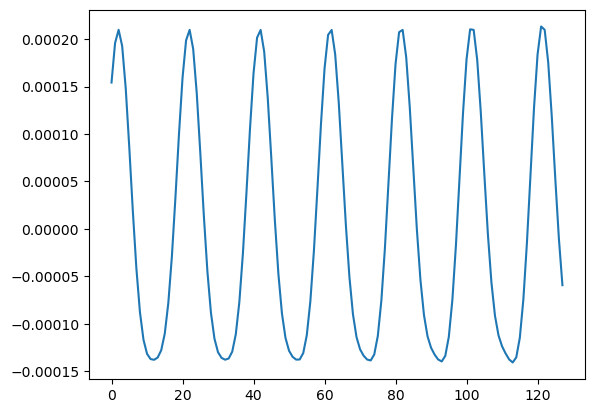

[ 1.54174344e-04+1.35525272e-20j  1.95797094e-04+8.47032947e-21j
  2.09738046e-04+1.69406589e-21j ... -3.19550464e-05+1.01643954e-20j
  2.82713025e-05+6.77626358e-21j  9.42082943e-05+2.37169225e-20j]


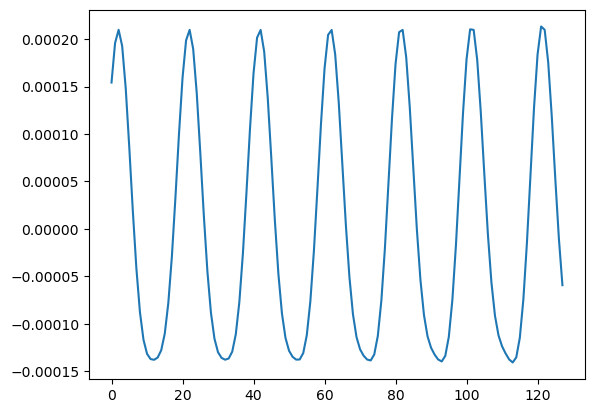

[ 1.54174344e-04+1.35525272e-20j  1.95797094e-04+8.47032947e-21j
  2.09738046e-04+1.69406589e-21j ... -3.19550464e-05+1.01643954e-20j
  2.82713025e-05+6.77626358e-21j  9.42082943e-05+2.37169225e-20j]


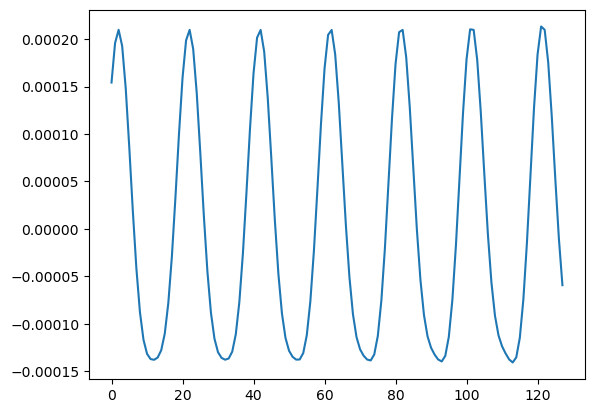

[ 1.54174344e-04+1.35525272e-20j  1.95797094e-04+8.47032947e-21j
  2.09738046e-04+1.69406589e-21j ... -3.19550464e-05+1.01643954e-20j
  2.82713025e-05+6.77626358e-21j  9.42082943e-05+2.37169225e-20j]


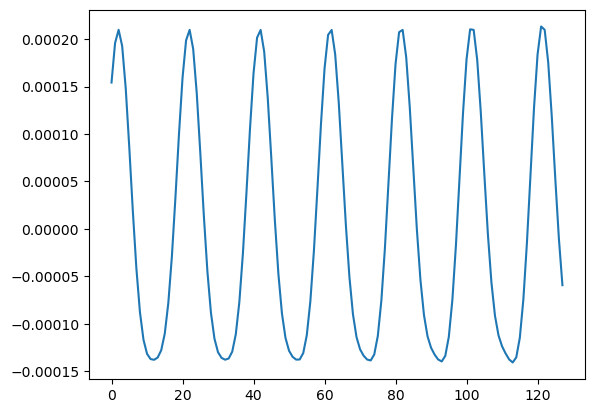

[ 1.54174344e-04+1.35525272e-20j  1.95797094e-04+8.47032947e-21j
  2.09738046e-04+1.69406589e-21j ... -3.19550464e-05+1.01643954e-20j
  2.82713025e-05+6.77626358e-21j  9.42082943e-05+2.37169225e-20j]


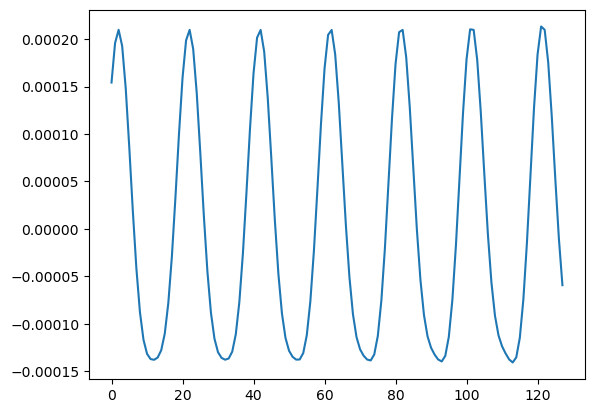

[ 1.54174344e-04+1.35525272e-20j  1.95797094e-04+8.47032947e-21j
  2.09738046e-04+1.69406589e-21j ... -3.19550464e-05+1.01643954e-20j
  2.82713025e-05+6.77626358e-21j  9.42082943e-05+2.37169225e-20j]


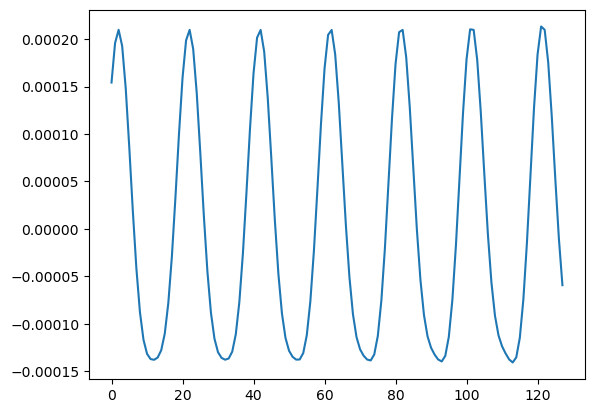

[ 2.04936761e-04+1.35525272e-20j  2.54281716e-04+6.77626358e-21j
  2.70264265e-04+0.00000000e+00j ... -2.86671721e-05+1.35525272e-20j
  5.00266160e-05+6.77626358e-21j  1.32317954e-04+2.37169225e-20j]


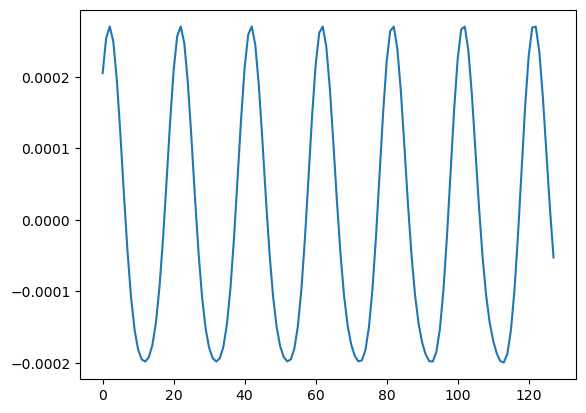

[ 2.04936761e-04+1.35525272e-20j  2.54281716e-04+6.77626358e-21j
  2.70264265e-04+0.00000000e+00j ... -2.86671721e-05+1.35525272e-20j
  5.00266160e-05+6.77626358e-21j  1.32317954e-04+2.37169225e-20j]


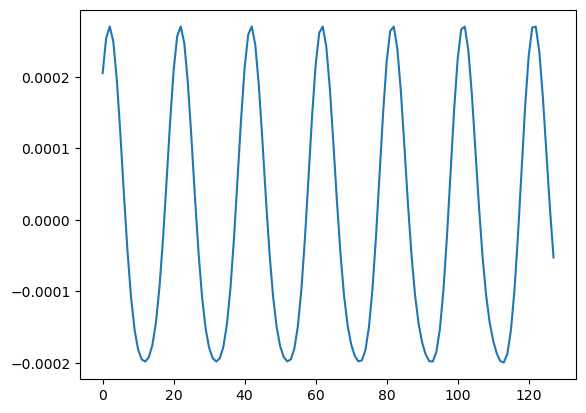

[ 2.04936761e-04+1.35525272e-20j  2.54281716e-04+6.77626358e-21j
  2.70264265e-04+0.00000000e+00j ... -2.86671721e-05+1.35525272e-20j
  5.00266160e-05+6.77626358e-21j  1.32317954e-04+2.37169225e-20j]


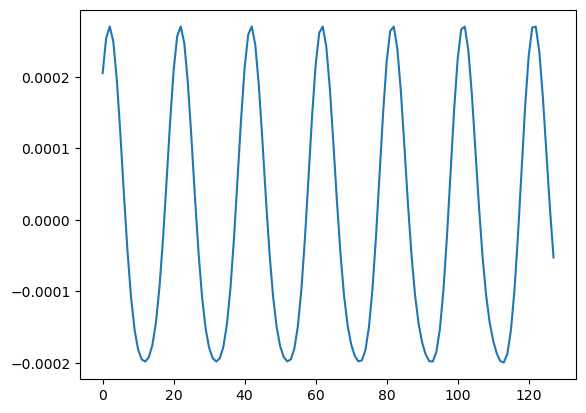

[ 2.04936761e-04+1.35525272e-20j  2.54281716e-04+6.77626358e-21j
  2.70264265e-04+0.00000000e+00j ... -2.86671721e-05+1.35525272e-20j
  5.00266160e-05+6.77626358e-21j  1.32317954e-04+2.37169225e-20j]


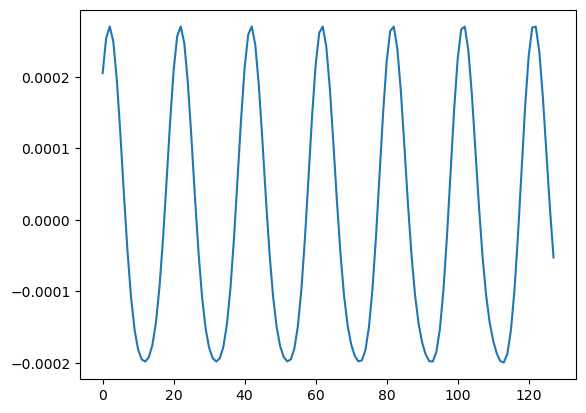

[ 2.04936761e-04+1.35525272e-20j  2.54281716e-04+6.77626358e-21j
  2.70264265e-04+0.00000000e+00j ... -2.86671721e-05+1.35525272e-20j
  5.00266160e-05+6.77626358e-21j  1.32317954e-04+2.37169225e-20j]


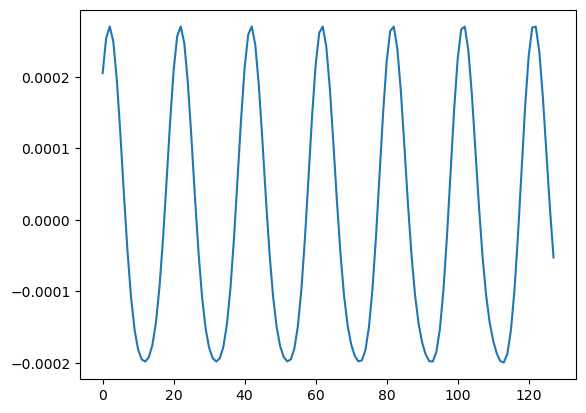

[ 2.04936761e-04+1.35525272e-20j  2.54281716e-04+6.77626358e-21j
  2.70264265e-04+0.00000000e+00j ... -2.86671721e-05+1.35525272e-20j
  5.00266160e-05+6.77626358e-21j  1.32317954e-04+2.37169225e-20j]


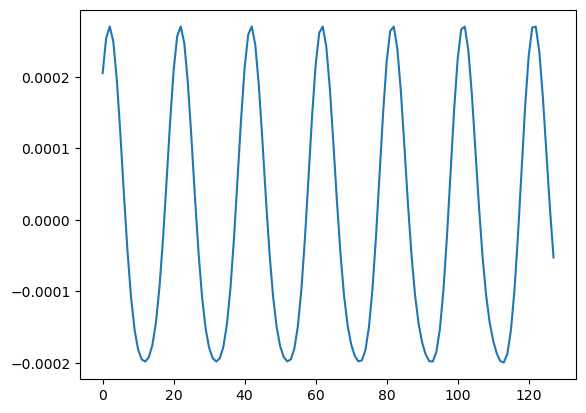

[ 2.04936761e-04+1.35525272e-20j  2.54281716e-04+6.77626358e-21j
  2.70264265e-04+0.00000000e+00j ... -2.86671721e-05+1.35525272e-20j
  5.00266160e-05+6.77626358e-21j  1.32317954e-04+2.37169225e-20j]


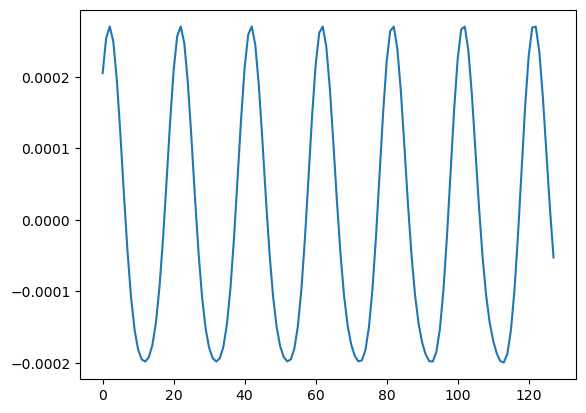

[ 2.35068808e-04+1.35525272e-20j  3.32864186e-04+6.77626358e-21j
  3.67366296e-04+0.00000000e+00j ... -1.25768389e-04+1.35525272e-20j
 -2.83473147e-05+6.77626358e-21j  1.02522742e-04+2.37169225e-20j]


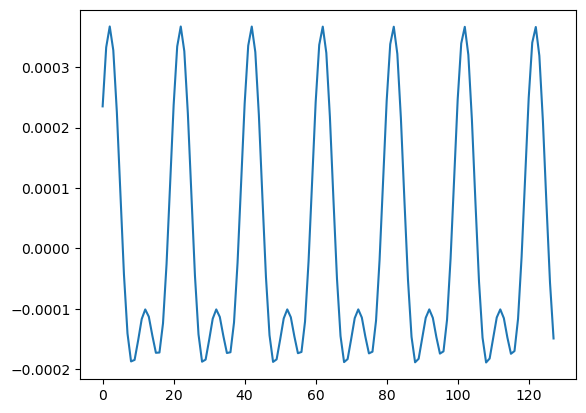

In [51]:
ffty = np.fft.fft(y)/N
for j in np.linspace(0.01,0.2,20):
    pl.figure()
    seuil = j
    cut = lambda x: 0 if abs(x) < seuil else x
    ffty_cut = [cut(i) for i in ffty]
    y_inv = np.fft.ifft(ffty_cut)
    print(y_inv)
    pl.plot(np.arange(128),y_inv[:128])
    pl.show()

[-7.41003642e-05+2.62580214e-20j -3.36075013e-05-8.47032947e-21j
 -1.19943702e-04+6.22569216e-20j ...  7.95654180e-05-2.11758237e-20j
  1.79882857e-04+2.06728979e-20j  3.68579965e-05-3.54695047e-20j]


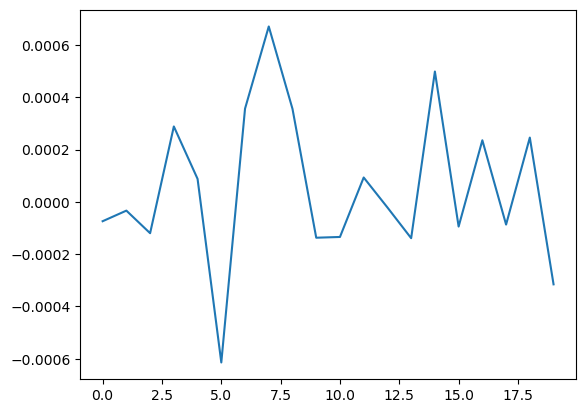

[ 3.09854486e-04+1.77876919e-20j  7.00714123e-05+4.23516474e-21j
  6.29254769e-05-1.69406589e-20j ...  1.28188759e-04+8.63973606e-20j
 -1.32855039e-04+1.52465931e-20j  1.52608546e-06-3.63165376e-20j]


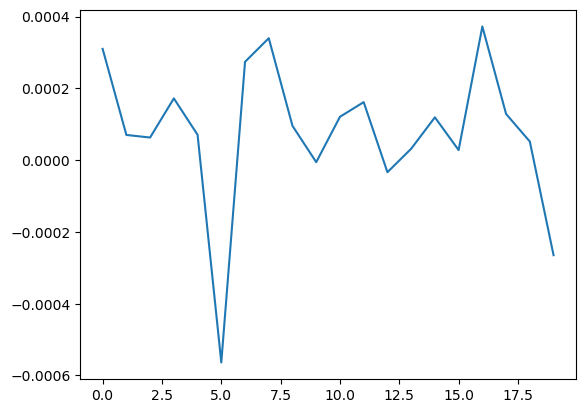

[ 3.63112436e-05+1.79994501e-20j  1.25234929e-05+0.00000000e+00j
  1.33868233e-04+2.32934060e-21j ...  1.72449327e-04+2.92226367e-20j
 -8.72853360e-06-6.77626358e-21j  1.21818236e-04-1.27054942e-21j]


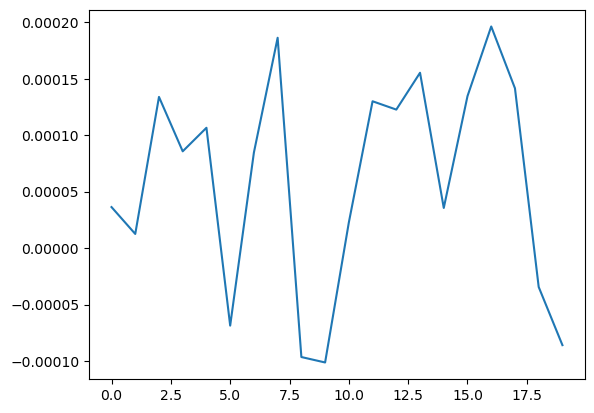

[5.78107295e-05+6.77626358e-21j 1.50133784e-04-3.38813179e-21j
 1.23752561e-04+4.65868121e-21j ... 1.56676955e-04+1.69406589e-21j
 7.32637602e-05+4.23516474e-21j 9.32898197e-06+3.38813179e-21j]


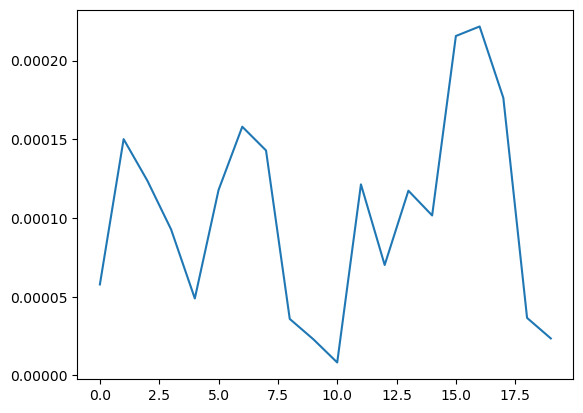

[ 7.02695004e-05+6.77626358e-21j  1.67335996e-04-6.77626358e-21j
  1.26340180e-04+8.04681300e-21j ...  1.45978035e-04+0.00000000e+00j
  4.46845883e-05+3.38813179e-21j -5.28160301e-07+1.01643954e-20j]


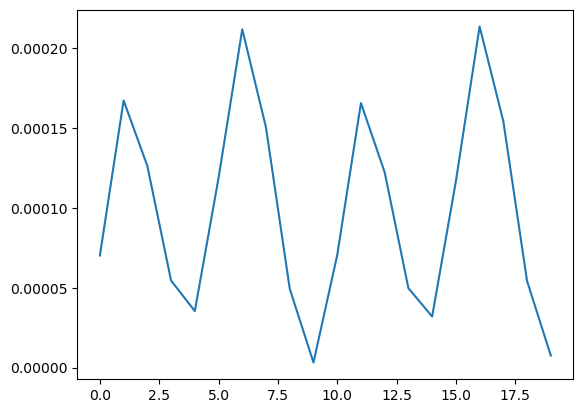

[9.47836749e-05+3.38813179e-21j 2.05721047e-04-6.77626358e-21j
 1.10403765e-04-5.50571416e-21j ... 1.10311626e-04+6.77626358e-21j
 7.75718773e-05+0.00000000e+00j 1.74882325e-06-3.38813179e-21j]


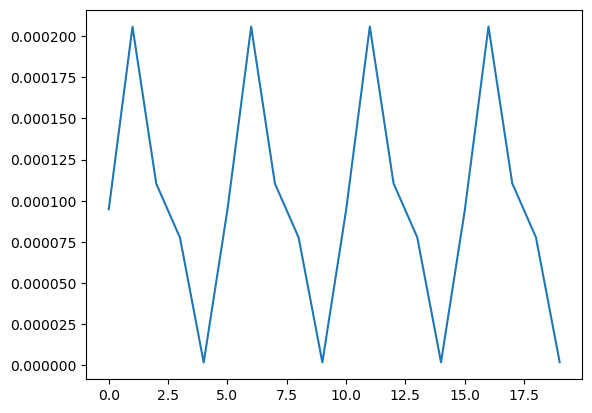

[9.47836749e-05+3.38813179e-21j 2.05721047e-04-6.77626358e-21j
 1.10403765e-04-5.50571416e-21j ... 1.10311626e-04+6.77626358e-21j
 7.75718773e-05+0.00000000e+00j 1.74882325e-06-3.38813179e-21j]


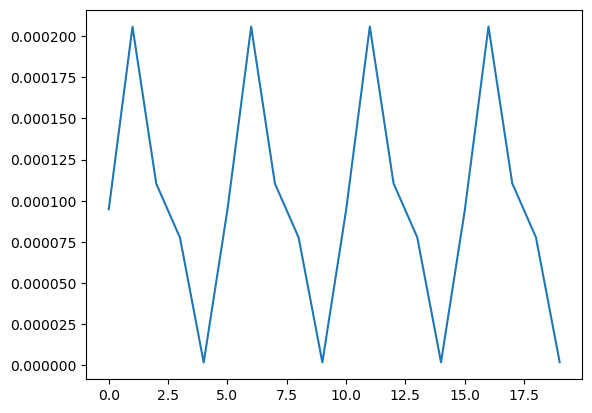

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


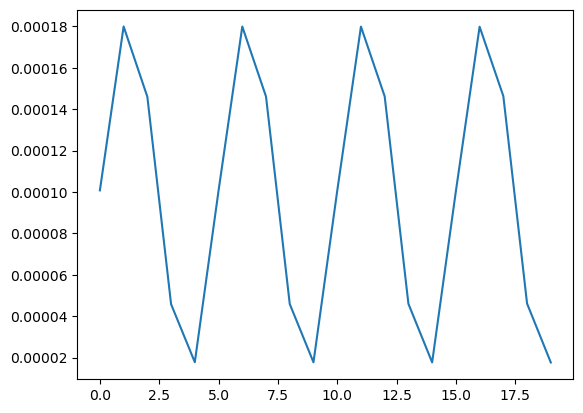

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


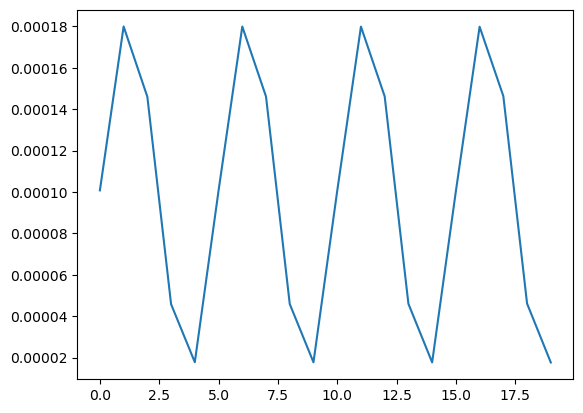

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


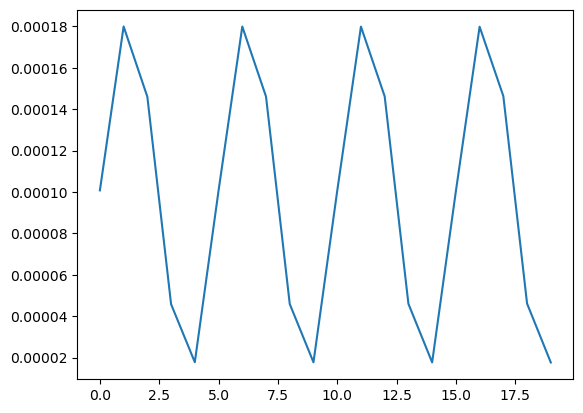

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


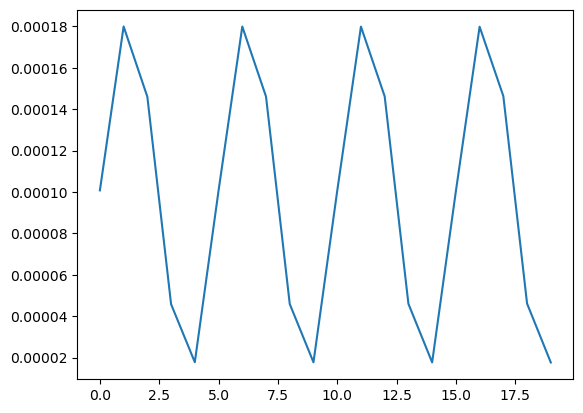

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


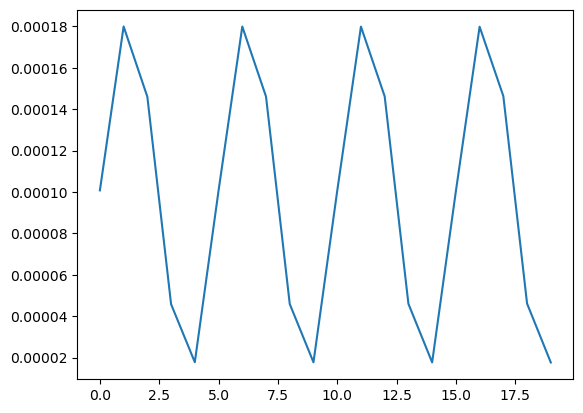

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


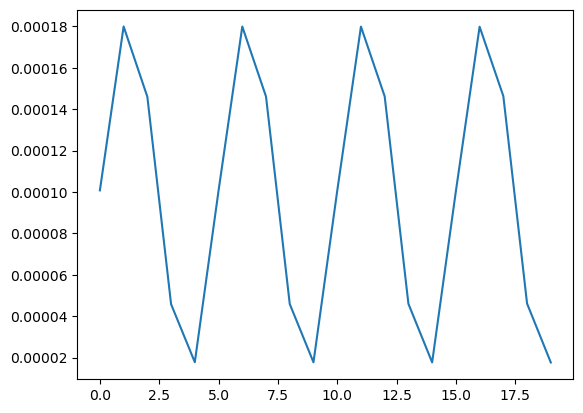

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


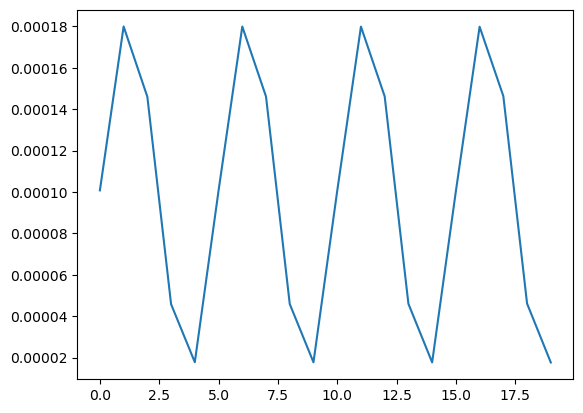

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


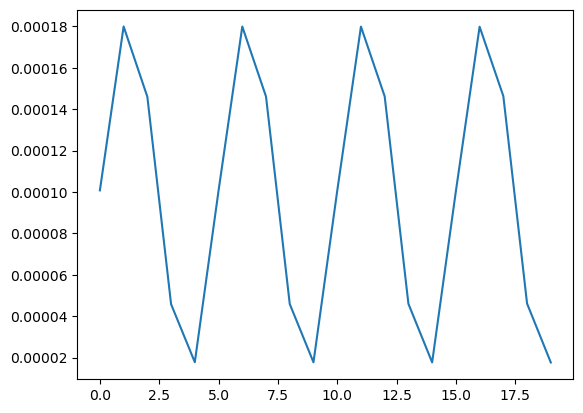

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


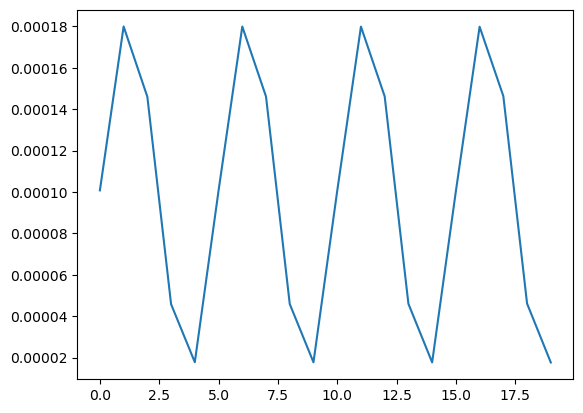

[1.00776655e-04+0.00000000e+00j 1.80000048e-04-3.38813179e-21j
 1.46009674e-04-6.77626358e-21j ... 1.45901347e-04+6.77626358e-21j
 4.56558411e-05+0.00000000e+00j 1.77773017e-05+0.00000000e+00j]


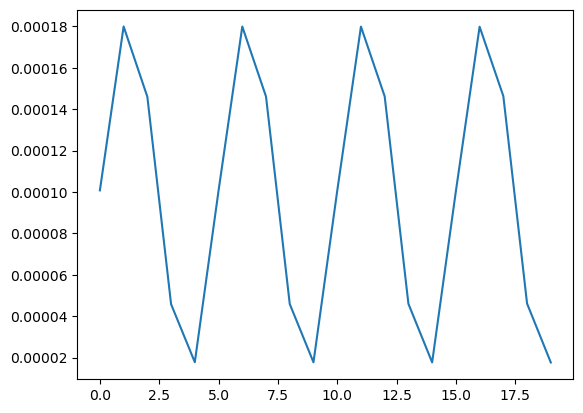

[9.80431905e-05+0.j 9.80431905e-05+0.j 9.80431905e-05+0.j ...
 9.80431905e-05+0.j 9.80431905e-05+0.j 9.80431905e-05+0.j]


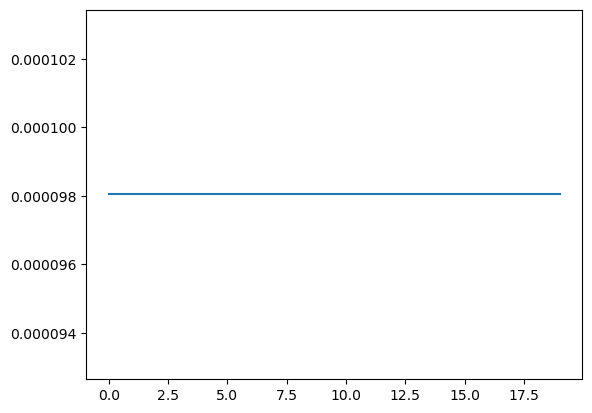

[9.80431905e-05+0.j 9.80431905e-05+0.j 9.80431905e-05+0.j ...
 9.80431905e-05+0.j 9.80431905e-05+0.j 9.80431905e-05+0.j]


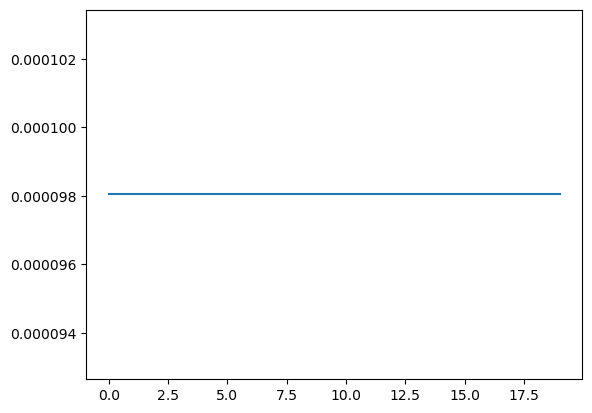

[9.80431905e-05+0.j 9.80431905e-05+0.j 9.80431905e-05+0.j ...
 9.80431905e-05+0.j 9.80431905e-05+0.j 9.80431905e-05+0.j]


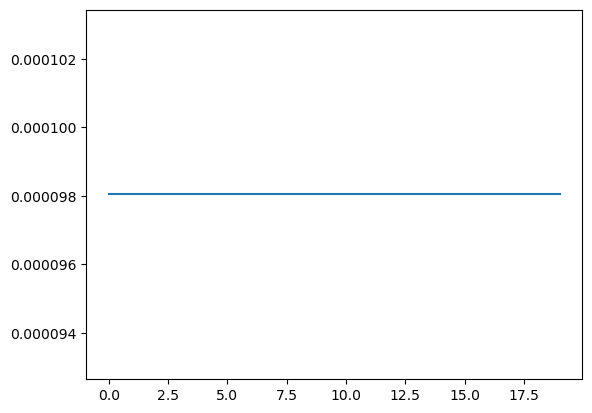

In [53]:
N = 4096
f0 = 0.05
x = N*f0*np.arange(N) - np.floor(N*f0*np.arange(N))
b = np.random.randn(N)
y = x+b
ffty = abs(np.fft.fft(y))/N
fftx = abs(np.fft.fft(x))/N
abscisse = np.fft.fftfreq(N)
ffty = np.fft.fft(y)/N
for j in np.linspace(0.01,0.2,20):
    pl.figure()
    seuil = j
    cut = lambda x: 0 if abs(x) < seuil else x
    ffty_cut = [cut(i) for i in ffty]
    y_inv = np.fft.ifft(ffty_cut)
    print(y_inv)
    pl.plot(np.arange(20),y_inv[:20])
    pl.show()